<h1 style="text-align: center;">Comprehensive Technical Analysis of Stocks: Trend Identification and Momentum Insights</h1>

#### Momentun Signals - 3 day volume and price performance

Strong Buy: Triggered when there's a positive change for three consecutive days and the price is above the SMA20 on the third day.

Buy Signal: Triggered on a positive three-day trend without requiring the price to be above the SMA20, provided it's not already classified as a 'Strong Buy'.

Strong Sell: Occurs when there's a negative change for three consecutive days and the price is below 98% of the SMA20 on the third day, indicating a significant downturn.

Sell Signal: Activated during a three-day negative trend where the price remains above the SMA20, capturing milder selling conditions.

##### Relative Strength Index (RSI)  

The Relative Strength Index (RSI) is a momentum oscillator commonly used in technical analysis to measure the speed and change of price movements. The RSI oscillates between zero and 100 and is typically used to identify overbought or oversold conditions in a stock, providing traders with potential buy or sell signals.

For BTG (B2Gold Corp), or any other asset, the RSI can be interpreted as follows:

Overbought Condition: An RSI value above 70 suggests that the stock may be overbought or overvalued and could be primed for a trend reversal or corrective pullback in price. This is often seen as a sell signal unless there are strong fundamental reasons for the stock price to keep rising.

Oversold Condition: An RSI value below 30 indicates an oversold or undervalued condition, potentially signaling an upcoming trend reversal or bullish correction. This is commonly interpreted as a buy signal.

Mid-Line Crosses: Movements from below to above the 50 line can signal a transition from bearish to bullish sentiment, and vice versa.

For BTG specifically, using the RSI can help identify the right moments to enter or exit trades based on these typical threshold levels. However, it's important to use the RSI in conjunction with other indicators and analysis techniques to confirm these signals, as relying solely on one indicator can lead to misleading conclusions.

#### Moving Average Convergence Divergence (MACD)

The Moving Average Convergence Divergence (MACD) is a trend-following momentum indicator that shows the relationship between two moving averages of a security’s price. The MACD is calculated by subtracting the 26-period Exponential Moving Average (EMA) from the 12-period EMA. The result of that calculation is the MACD line. A nine-day EMA of the MACD called the "signal line," is then plotted on top of the MACD line, which can function as a trigger for buy and sell signals.

Here are the key components and uses of the MACD:

MACD Line: Represents the difference between the 12 and 26-period EMAs. A positive MACD indicates that the 12-period EMA is above the 26-period EMA, suggesting upward momentum. Conversely, a negative MACD suggests downward momentum.

Signal Line: The average of the MACD itself, which is used to identify potential buy or sell opportunities around when the MACD crosses above or below this signal line.

Histogram: The MACD histogram measures the distance between the MACD line and its signal line. The histogram is positive when the MACD is above its signal line (bullish) and negative when the MACD is below its signal line (bearish). The height of the histogram bars can indicate the strength of the trend.

Buy and Sell Signals:

Bullish Signal: When the MACD line crosses above the signal line, it suggests a good time to buy or go long, indicating increasing bullish momentum.
Bearish Signal: Conversely, when the MACD line crosses below the signal line, it suggests a potential sell or short position, indicating increasing bearish momentum.
Divergence: If the price of an asset is making new highs while the MACD is failing to reach new highs, this is known as a bearish divergence, and it can signal a potential reversal. Similarly, a bullish divergence occurs when the price records new lows while the MACD fails to do so, which could indicate a potential upward turn.

In [91]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to load CSV data and process
def load_and_process_data(directory, file_name, symbol):
    # Construct the file path based on the relative directory
    file_path = os.path.join(directory, file_name)  # Use the passed file name inside the directory
    print(f"Looking for file: {file_path}")  # Print the file path to check for correctness
    
    if os.path.exists(file_path):
        data = pd.read_csv(file_path)  # Changed to read CSV file
        data['Date'] = pd.to_datetime(data['Date'])
        data.set_index('Date', inplace=True)
        # Sort data to ensure correct order for shift operations
        data.sort_index(ascending=True, inplace=True)  # Make sure data is sorted from oldest to newest
    
        process_and_plot(data, symbol)
    else:
        print(f"File {file_name} for {symbol} not found in directory: {directory}")

In [92]:
# Function to calculate RSI (Relative Strength Index)
def calculate_rsi(data, period=14):
    delta = data['Price'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    data['RSI_manual'] = 100 - (100 / (1 + rs))

# Function to calculate MACD (Moving Average Convergence Divergence)
def calculate_macd(data):
    data['EMA12'] = data['Price'].ewm(span=12, adjust=False).mean()
    data['EMA26'] = data['Price'].ewm(span=26, adjust=False).mean()
    data['MACD'] = data['EMA12'] - data['EMA26']
    data['MACD_signal'] = data['MACD'].ewm(span=9, adjust=False).mean()
    data['MACD_hist'] = data['MACD'] - data['MACD_signal']  

In [93]:
def generate_signals(data):
    # Clean 'Change %' by removing the '%' and converting it to numeric
    data['Change %'] = data['Change %'].replace({r'%': '', r',': ''}, regex=True)  # Remove % and commas
    data['Change %'] = pd.to_numeric(data['Change %'], errors='coerce')  # Convert to numeric, coerce invalid values to NaN

    # Strong Buy Signal: 3-day uptrend and above the 20-day SMA
    data['Strong_Buy'] = np.where(
        (data['Change %'] > 0) & 
        (data['Change %'].shift(1) > 0) &
        (data['Change %'].shift(2) > 0) & 
        (data['Price'] > data['SMA20']), 'Strong Buy', np.nan)

    # Buy Signal: Price is up for 3 consecutive days (not necessarily above SMA)
    data['Buy_Signal'] = np.where(
        (data['Change %'] > 0) & 
        (data['Change %'].shift(1) > 0) & 
        (data['Change %'].shift(2) > 0) & 
        data['Strong_Buy'].isna(), 'Buy/Hold', np.nan)

    # Strong Sell Signal: 3-day downtrend, significantly below SMA20
    data['Strong_Sell'] = np.where(
        (data['Change %'] < 0) & 
        (data['Change %'].shift(1) < 0) & 
        (data['Change %'].shift(2) < 0) & 
        (data['Price'] < data['SMA20'] * 0.98), 'Strong Sell', np.nan)

    # Sell Signal: Milder condition for sell signals
    data['Sell_Signal'] = np.where(
        (data['Change %'] < 0) & 
        (data['Change %'].shift(1) < 0) & 
        (data['Price'] > data['SMA20']) &  # Price above SMA20
        data['Strong_Sell'].isna(), 'Sell', np.nan)

    # Fill empty signals with NA where no signal exists
    data['Strong_Buy'] = data['Strong_Buy'].fillna('NA')
    data['Buy_Signal'] = data['Buy_Signal'].fillna('NA')
    data['Strong_Sell'] = data['Strong_Sell'].fillna('NA')
    data['Sell_Signal'] = data['Sell_Signal'].fillna('NA')

    return data


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the moving averages (SMA20, SMA50, SMA200)
def calculate_sma(data):
    # Calculate SMAs with a rolling window
    data['SMA20'] = data['Price'].rolling(window=20).mean()
    data['SMA50'] = data['Price'].rolling(window=50).mean()
    data['SMA200'] = data['Price'].rolling(window=200).mean()

    # Fill NaN values using forward fill and backfill if needed
    data['SMA20'] = data['SMA20'].fillna(method='ffill')  # Forward fill NaN values
    data['SMA50'] = data['SMA50'].fillna(method='ffill')
    data['SMA200'] = data['SMA200'].fillna(method='ffill')

    # If still NaN (initial values), backfill or set to last available value
    data['SMA20'] = data['SMA20'].fillna(method='bfill')  # Backfill NaN values
    data['SMA50'] = data['SMA50'].fillna(method='bfill')
    data['SMA200'] = data['SMA200'].fillna(method='bfill')
    #print(data[['SMA20', 'SMA50', 'SMA200']])  # Print out the SMAs to check the result

# Function to process the stock data, generate signals and plot
def process_and_plot(data, symbol):
    # Calculate Moving Averages, Signals, RSI, and MACD
    calculate_sma(data)
    generate_signals(data)
    calculate_rsi(data)
    calculate_macd(data)

    # Plot stock price with Moving Averages and signals
    plt.figure(figsize=(14, 7))
    plt.plot(data['Price'], label=f'{symbol} Close Price', color='blue')
    plt.plot(data['SMA20'], label=f'{symbol} 20-Day SMA', color='orange')
    plt.plot(data['SMA50'], label=f'{symbol} 50-Day SMA', color='green')
    plt.plot(data['SMA200'], label=f'{symbol} 200-Day SMA', color='red')

    # Plot Buy/Hold and Strong Buy signals
    plt.scatter(data.index[data['Strong_Buy'] == 'Strong Buy'], data['Price'][data['Strong_Buy'] == 'Strong Buy'], label='Strong Buy', marker='^', color='darkgreen', s=100)
    plt.scatter(data.index[data['Buy_Signal'] == 'Buy/Hold'], data['Price'][data['Buy_Signal'] == 'Buy/Hold'], label='Buy Signal', marker='^', color='green', s=100)
    
    # Plot Sell and Strong Sell signals
    plt.scatter(data.index[data['Sell_Signal'] == 'Sell'], data['Price'][data['Sell_Signal'] == 'Sell'], label='Sell Signal', marker='v', color='red', s=100)
    plt.scatter(data.index[data['Strong_Sell'] == 'Strong Sell'], data['Price'][data['Strong_Sell'] == 'Strong Sell'], label='Strong Sell', marker='v', color='darkred', s=100)

    # Add Titles and Labels
    plt.title(f'{symbol} Stock Price with Buy/Sell Signals and Moving Averages')
    plt.legend(loc='best')
    
    # Plot RSI
    plt.figure(figsize=(14, 7))
    plt.plot(data['RSI_manual'], label=f'{symbol} RSI', color='purple')
    plt.axhline(70, color='r', linestyle='--', label='Overbought')
    plt.axhline(30, color='g', linestyle='--', label='Oversold')
    plt.title(f'{symbol} RSI Indicator')
    plt.legend(loc='best')
    plt.show()

    # Plot MACD
    plt.figure(figsize=(14, 7))
    plt.plot(data['MACD'], label=f'{symbol} MACD', color='blue')
    plt.plot(data['MACD_signal'], label=f'{symbol} MACD Signal', linestyle='--', color='orange')
    plt.bar(data.index, data['MACD_hist'], label='MACD Histogram', color='gray')
    plt.title(f'{symbol} MACD Indicator')
    plt.legend(loc='best')
    plt.show()

    # Show the plot
    plt.show()

    # Save the dataframe with all indicators to an Excel file
    output_file = f"{symbol}_Stock_Analysis.xlsx"
    data.to_excel(output_file)
    print(f"Data saved to {output_file}")

#### Technical Analysis - 'BTG'

Looking for file: ./datafiles\B2Gold Stock Price History.csv


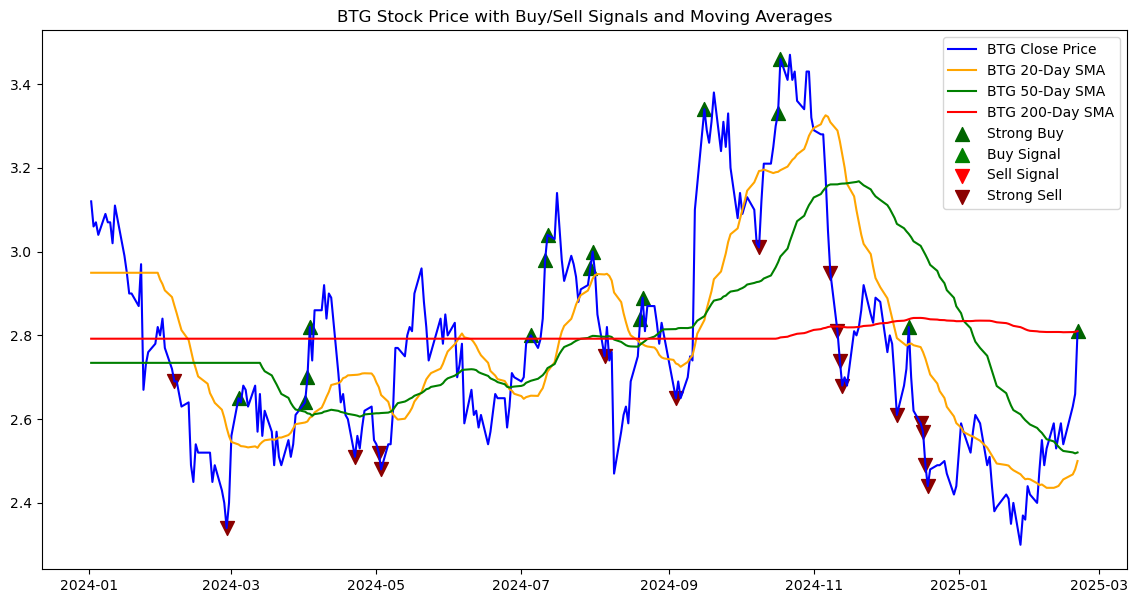

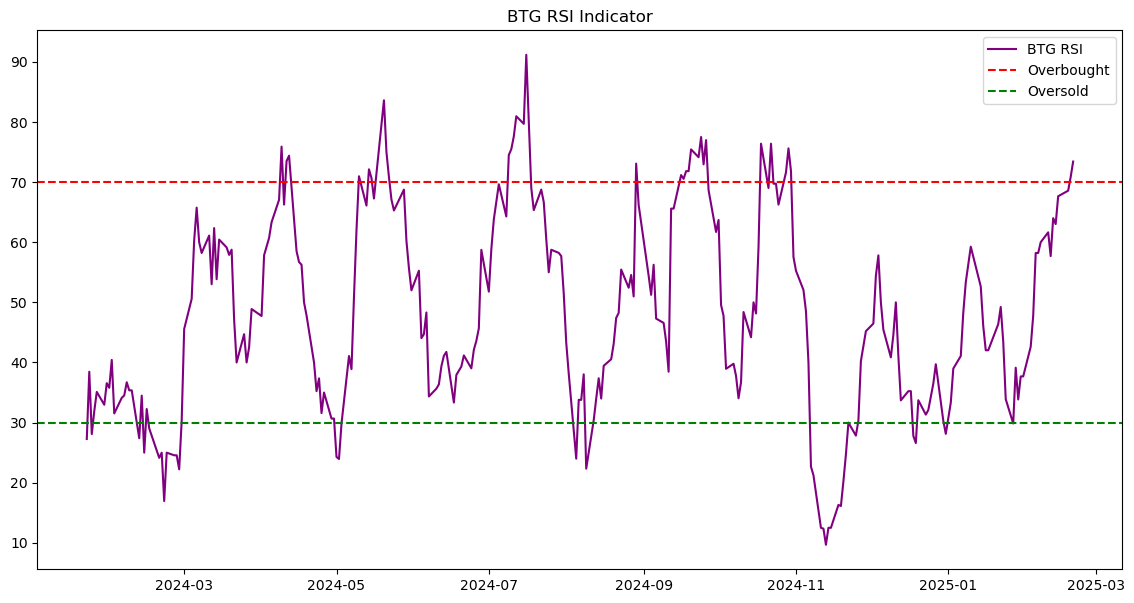

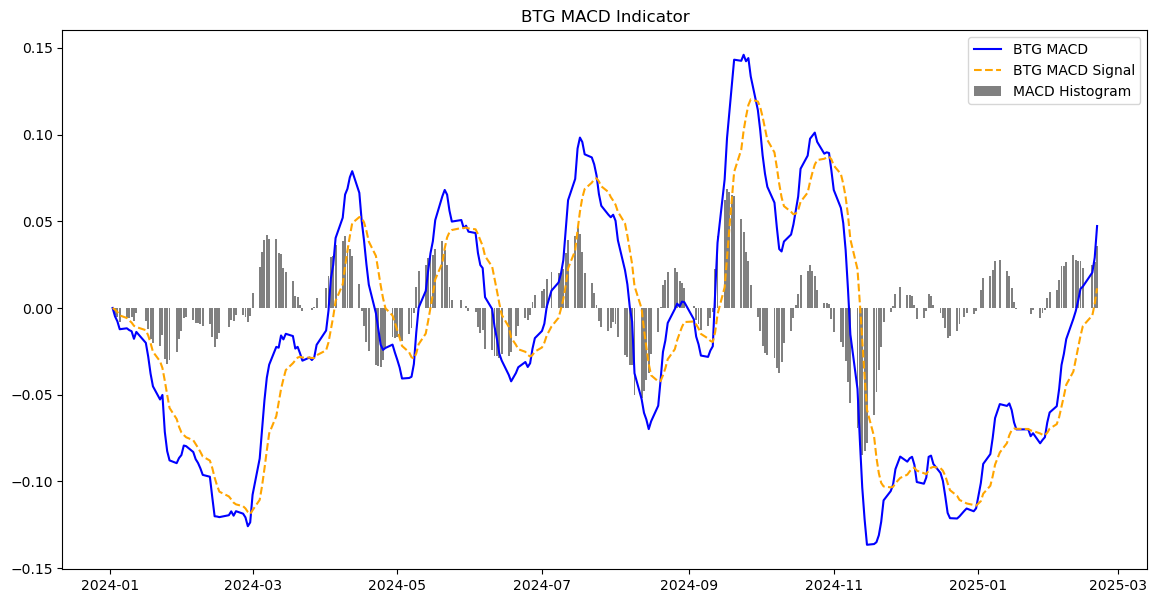

Data saved to BTG_Stock_Analysis.xlsx


In [98]:
# Usage for 'BTG'
directory = './datafiles'  # Relative path
file_name = 'B2Gold Stock Price History.csv'
symbol = 'BTG'  # Stock symbol
load_and_process_data(directory, file_name, symbol)

#### Conclusion for Stock- BTG - Strong Buy (Short Term)

Stock Price with Moving Averages: The stock price has experienced significant volatility, demonstrated by its frequent crossovers with the 20-day, 50-day, and 200-day Simple Moving Averages (SMAs). Notably, there seems to be a recent upward trend where the price has surpassed all SMA lines, which might indicate a bullish movement.

RSI Indicator: The Relative Strength Index (RSI) has recently risen sharply, approaching or potentially entering the overbought territory (above 70). This suggests that the stock might be becoming overvalued, and there could be a risk of a downward correction as traders might start taking profits.

MACD Indicator: The Moving Average Convergence Divergence (MACD) indicates increasing bullish momentum as the MACD line has crossed above the signal line and is ascending, which typically suggests that the upward momentum is strengthening.

Current State: The combination of these indicators points to a strong bullish trend in the near term. However, with the RSI nearing overbought levels, there is a risk of reversal or pullback in the short term. Investors should monitor these signals closely for any signs of reversal, especially if the RSI crosses above 70, which could prompt a corrective phase in response to overbuying conditions.

#### Technical Analysis - 'SO'

Looking for file: ./datafiles\Southern Stock Price History.csv


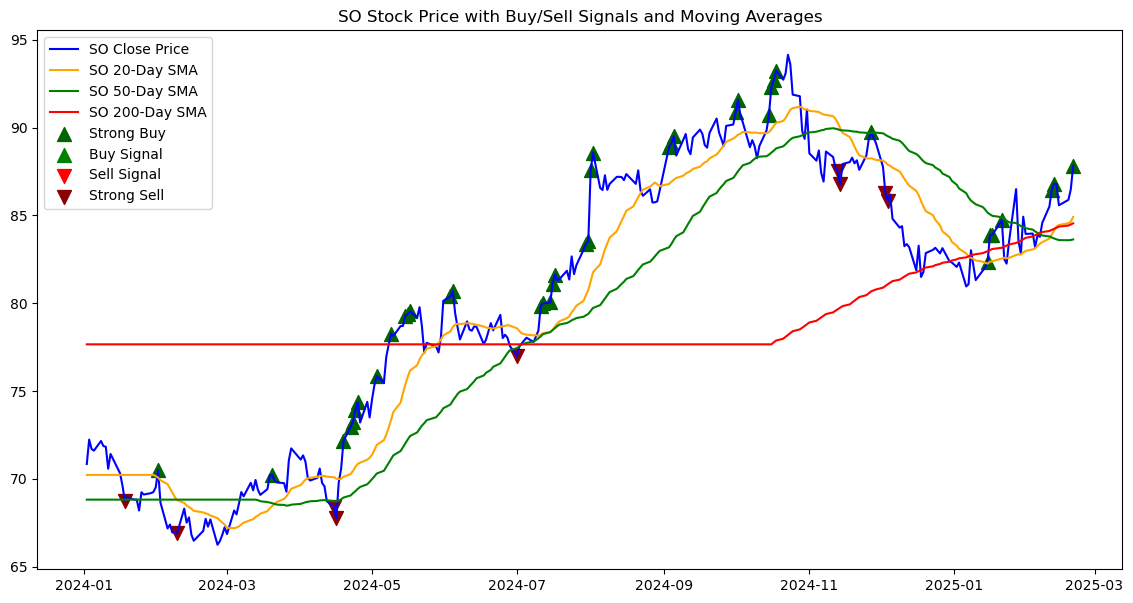

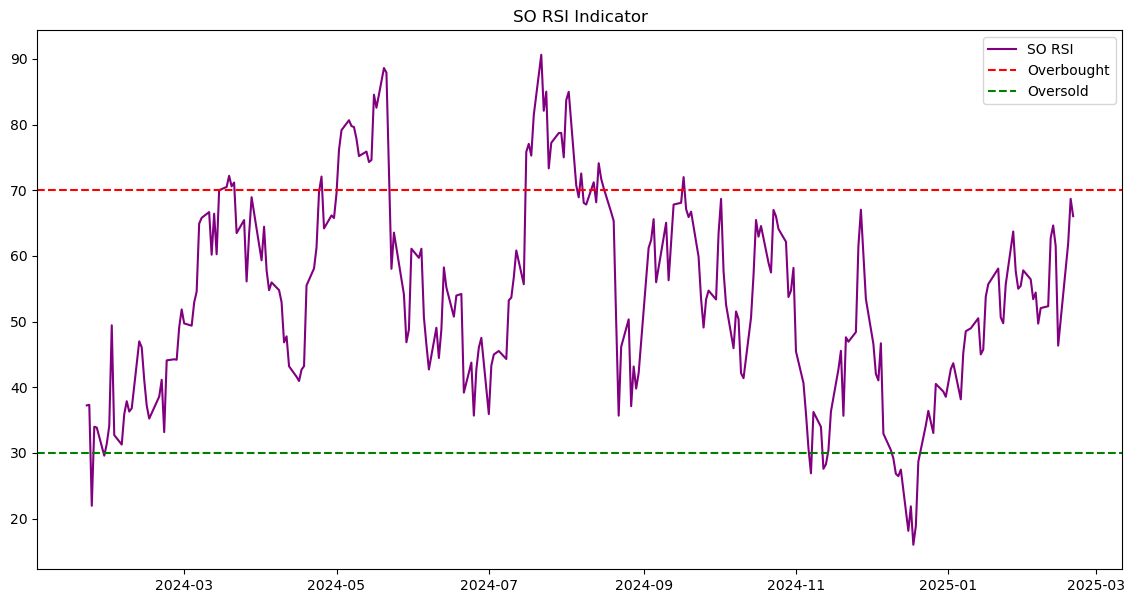

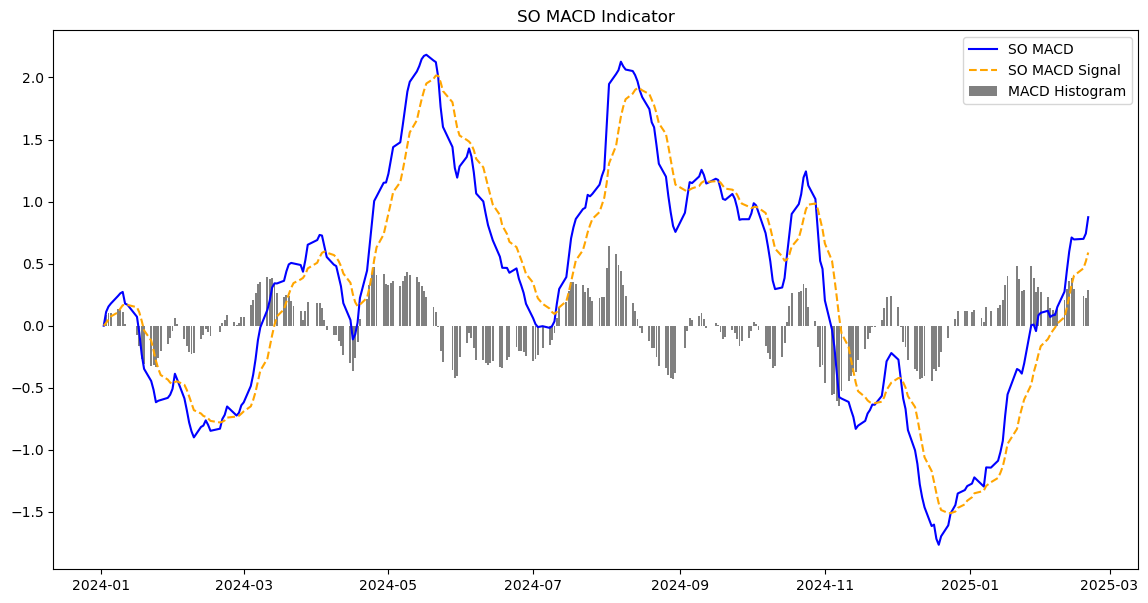

Data saved to SO_Stock_Analysis.xlsx


In [99]:
# Usage for 'SO'
directory = './datafiles'  # Relative path
file_name = 'Southern Stock Price History.csv'
symbol = 'SO'  # Stock symbol
load_and_process_data(directory, file_name, symbol)

#### Conclusion for Stock- BTG - Strong Buy (Short Term)

Stock Price and Moving Averages:

The stock price (SO) has shown significant volatility, oscillating around the 50-Day and 200-Day SMAs. There have been multiple buy and sell signals that correlate with the stock's movement relative to these averages.
The presence of strong buy signals when the stock crosses above the SMAs and strong sell signals on crossing below suggests a trend-following strategy.

RSI Indicator:

The RSI has oscillated between oversold and overbought zones several times within the period displayed, indicating potential reversal points. Recent readings approaching the upper boundary suggest the stock might be becoming overbought.

MACD Indicator:

The MACD line crossing above the signal line indicates bullish momentum, while crossings below suggest bearish momentum. The histogram provides a visual representation of the momentum strength.
Recently, the MACD has shown increasing bullish momentum as it rises sharply, a sign that the stock might continue to rise in the short term.
Conclusion: The combination of RSI nearing overbought levels and a sharp increase in MACD might suggest that while the bullish momentum is strong, there might be a potential for a pullback or consolidation in the near future, especially if the RSI crosses into the overbought zone. Investors might look for signs of a reversal in these indicators to adjust their positions, possibly taking profits if they align with strong sell signals from the moving average or RSI strategies.

we can perform similar TA(Technical Analysis) on other stocks list and identify and understand the current state of the stock condition on the market.